In [19]:
%load_ext autoreload  
# Load the autoreload extension to automatically reload modules before executing user code.

%autoreload 2  
# Set autoreload to mode 2, which reloads all imported modules before executing a new code block.

import sys  
sys.path.append('../')  
# Add the parent directory to the system path to allow importing 'class_func.py' from the upper directory.

import OCPY as op  
# Import the 'OCPY.py' module and alias it as 'op' for easier reference.

import numpy as np  
# Import NumPy for numerical operations.

from matplotlib import pyplot as plt  
# Import the plotting module from Matplotlib for visualizing data.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
epochs = np.linspace(-30000, 55000, 60000)  
# Create an array of epoch values where the model will be applied.
# The array spans from -30,000 to 55,000 with 60,000 evenly spaced points.

In [21]:
func = op.OC_model(epochs=epochs)  
# Create an OC_model object to represent the overall O-C (Observed minus Calculated) model.
# The 'epochs' array is passed to define the time values where the model will be evaluated.

lin = op.Lin()  
# Create a linear model component to be added to the OC model.

lin.dP = op.Parameter(0)  
# Assign a small change in period (dP) to the linear model component.

lin.dT = 0
# Assign a time shift (dT) to the linear model component.

quad = op.Quad()  
# Create a quadratic model component to be added to the OC model.

quad.Q = op.Parameter(0)  
# Assign a quadratic term affecting period evolution, ensuring it remains non-negative.

lite = op.LiTE()  
# Create a LiTE (Light-Time Effect) model component to simulate the effect of an unseen companion.

lite.amp = op.Parameter(0.04 * 24 * 3600, unit="second", min=0)  
# Set the amplitude of the LiTE effect, converted to seconds.

lite.e = op.Parameter(0.5, min=0, max=1)  
# Set the eccentricity of the orbit, constrained between 0 and 1.

lite.P_LiTE = op.Parameter(55000 * 0.370564, unit="day", min=0)  
# Convert and assign the orbital period of the LiTE model in days.

lite.T_LiTE = op.Parameter(40000 * 0.370564 + 39954.025, unit="BJD")  
# Compute and set the time of periastron passage in BJD.

lite.omega = op.Parameter(0, min=0, max=360)  
# Convert and assign the argument of periapsis in degrees, ensuring it remains within the valid range.

func.add_model_component(lin)  
# Add the linear model component to the OC model.

func.add_model_component(quad)  
# Add the quadratic model component to the OC model.

func.add_model_component(lite)  
# Add the LiTE model component to the OC model.

func.Ref_period = 0.370564  
# Set the reference period of the system.

func.Ref_mintime = 39954.025  
# Set the reference minimum time for phase calculations.


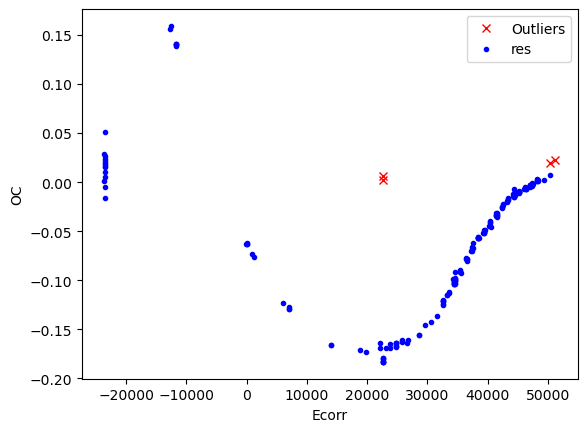

In [22]:
data = op.OC_data(data_file="999_xy_boo.xlsx")  
# Load the OC data from the provided Excel file.
# This data contains minimum times, errors, and observational details for XY Boo.

outliers = data.sigma_outliers(
    treshold=3, 
    plot=True, 
    additional_method="moving_window", 
    additional_params={"window_rate": 0.1, "window_step_rate": 0.03}
)  
# Identify outliers using both the standard sigma-clipping method (±3 * sigma) and a moving window approach.
# - 'treshold=3' sets the outlier threshold at 3 standard deviations from the mean.
# - 'plot=True' generates a plot showing retained and removed data points.
# - 'additional_method="moving_window"' enables localized outlier detection within a sliding window.
# - 'window_rate=0.1' defines the window size as 10% of the dataset length.
# - 'window_step_rate=0.03' defines how much the window moves forward per step (3% of the dataset).

data = data.remove_outliers(outliers=outliers)  
# Remove the identified outlier points from the dataset.
# This results in a cleaner dataset for O-C analysis.

In [23]:
data = data.remove_data(data_groups="vis")  
# Remove all data points that belong to the "vis" (visual) observation group.
# This filters out visual observations, which may have larger uncertainties, leaving only other data types.

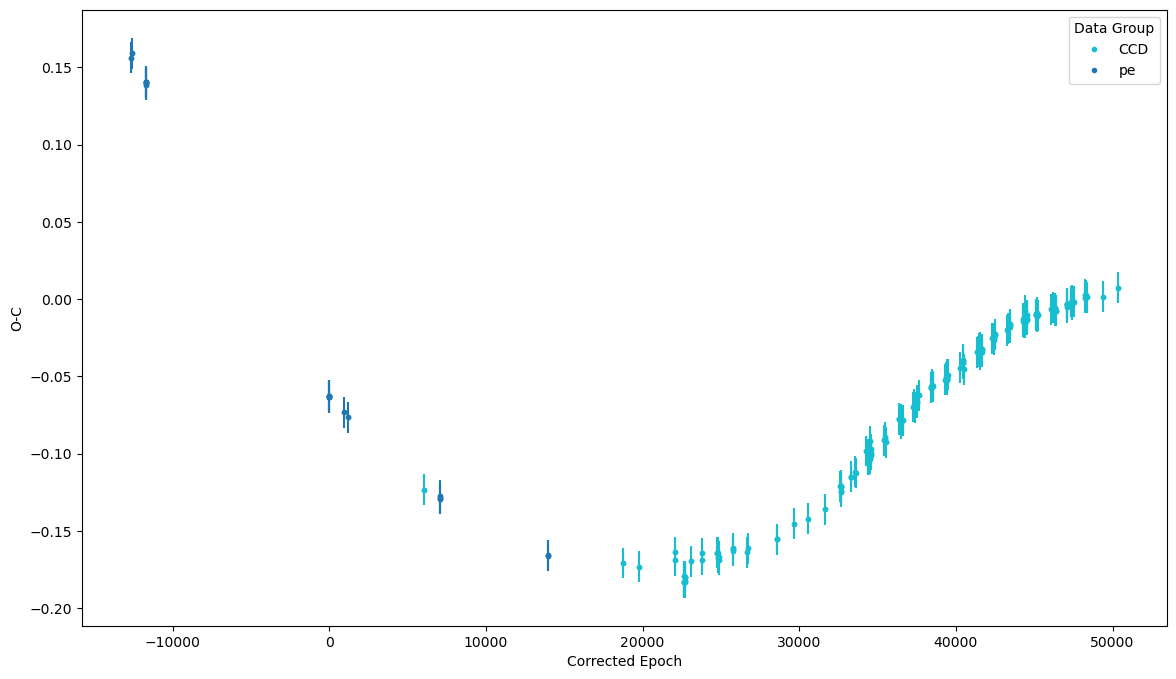

In [24]:
data.plot_OC()

In [25]:
data = data.fill_errors(method="with_value", group=None, value=0.01)  
# Assign a fixed error value of 0.01 to all data points regardless of their group.
# This is useful when uncertainties are not provided in the dataset.

data = data.fill_errors(method="with_value", group="pe", value=0.02)  
# Assign a specific error value of 0.02 to data points belonging to the "pe" (photoelectric) group.
# This allows different observational methods to have distinct uncertainties.

data.fill_weights()  
# Compute and assign weights to each data point based on their errors.
# Typically, weights are calculated as the inverse of the squared errors: weight = 1 / error².

print(data.Errors)  
# Print the assigned errors for verification.

[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.01
 0.02 0.02 0.02 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [26]:
fit = op.fit(model=func, data=data)
# Create a fitting object that links the OC model (`func`) with the observational data (`data`).
# This prepares the model for parameter optimization.

e= 0.5


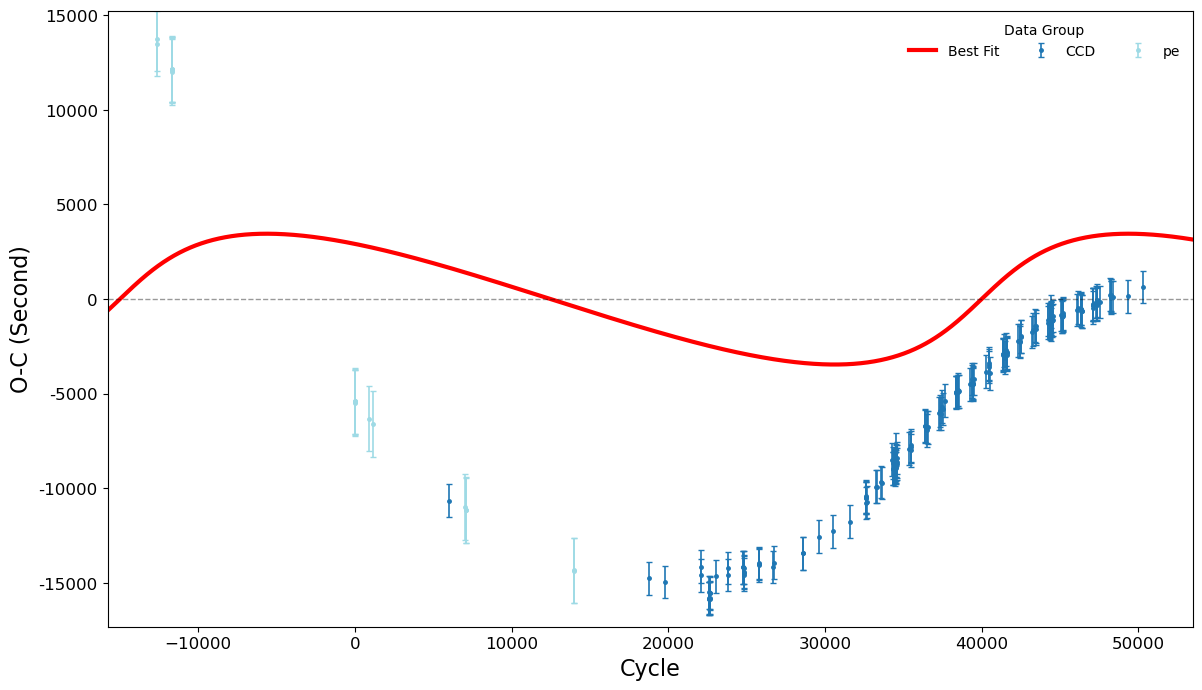

In [27]:
fit.plot(show=False)

In [28]:
result = fit.fit_model(method='leastsq')

e= 0.5
e= 0.5
e= 0.5
e= 0.5
e= 0.5
e= 0.5
e= 0.5
e= 0.5000049999999999
e= 0.5
e= 0.5
e= 0.5
e= 0.5
e= 0.38234153128325943
e= 0.38234153128325943
e= 0.38234153128325943
e= 0.38234153128325943
e= 0.38234268565401514
e= 0.38234153128325943
e= 0.38234153128325943
e= 0.38234153128325943
e= 0.38234153128325943
e= 0.5856879390753735
e= 0.5856879390753735
e= 0.5856879390753735
e= 0.5856879390753735
e= 0.5856887874656389
e= 0.5856879390753735
e= 0.5856879390753735
e= 0.5856879390753735
e= 0.5856879390753735
e= 0.02608239451644989
e= 0.42689655562597884
e= 0.496565737043229
e= 0.5152118234106717
e= 0.5152118234106717
e= 0.5152118234106717
e= 0.5152118234106717
e= 0.5152119754819543
e= 0.5152118234106717
e= 0.5152118234106717
e= 0.5152118234106717
e= 0.5152118234106717
e= 0.49772547557358243
e= 0.5039190415601247
e= 0.5039190415601247
e= 0.5039190415601247
e= 0.5039190415601247
e= 0.5039190807497377
e= 0.5039190415601247
e= 0.5039190415601247
e= 0.5039190415601247
e= 0.5039190415601247
e= 0.50221

In [29]:
result.fit_report()

'[[Model]]\n    Model(total_oc_delay_lmfit)\n[[Fit Statistics]]\n    # fitting method   = leastsq\n    # function evals   = 1222\n    # data points      = 179\n    # variables        = 8\n    chi-square         = 178220.641\n    reduced chi-square = 1042.22597\n    Akaike info crit   = 1251.70713\n    Bayesian info crit = 1277.20622\n    R-squared          = 0.99736406\n[[Variables]]\n    dP_Lin:      -1.1911e-05 +/- 2.7960e-05 (234.75%) (init = 0)\n    dT_Lin:       0.02010923 +/- 0.36117801 (1796.08%) (init = 0)\n    Q_Quad:       2.1441e-10 +/- 3.0946e-10 (144.33%) (init = 0)\n    e_LiTE:       0.49634095 +/- 0.96472818 (194.37%) (init = 0.5)\n    omega_LiTE:   76.5427671 +/- 14.5070601 (18.95%) (init = 0)\n    P_LiTE_LiTE:  31077.9424 +/- 108865.437 (350.30%) (init = 20381.02)\n    T_LiTE_LiTE:  55223.5937 +/- 339.056788 (0.61%) (init = 54776.58)\n    amp_LiTE:     6465.59345 +/- 23867.4987 (369.15%) (init = 3456)\n[[Correlations]] (unreported correlations are < 0.100)\n    C(dT_Li

In [30]:
print(type(result))

<class 'lmfit.model.ModelResult'>


In [31]:
fitted_params = result.params
for param_name, param in fitted_params.items():
    print(f"{param_name}: {param.value} ± {param.stderr}")

dP_Lin: -1.191059895551233e-05 ± 2.795970362552465e-05
dT_Lin: 0.020109225804633993 ± 0.36117801080582623
Q_Quad: 2.144136448795424e-10 ± 3.094625198975257e-10
e_LiTE: 0.49634094515202115 ± 0.9647281843157407
omega_LiTE: 76.54276711239643 ± 14.507060142926706
P_LiTE_LiTE: 31077.94243510058 ± 108865.43651205405
T_LiTE_LiTE: 55223.59370806405 ± 339.0567875349918
amp_LiTE: 6465.593445752462 ± 23867.498742712974


In [32]:
new_model = fit.fitted_model

e= 0.49634094515202115


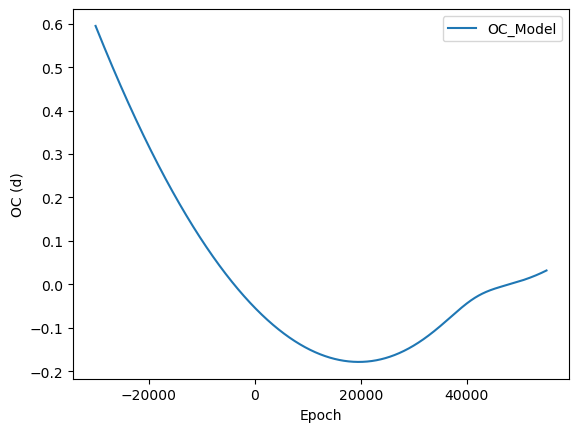

{'e': 0.49634094515202115 Unitless,
 'omega': 76.54276711239643 deg,
 'P_LiTE': 31077.94243510058 day,
 'T_LiTE': 55223.59370806405 BJD,
 'amp': 6465.593445752462 second}

In [33]:
new_model.plot()
new_model.model_components[2].params

In [34]:
for i in new_model.model_components:
    print(i.params)

{'dP': -1.191059895551233e-05 day, 'dT': 0.020109225804633993 day}
{'Q': 2.144136448795424e-10 Unitless}
{'e': 0.49634094515202115 Unitless, 'omega': 76.54276711239643 deg, 'P_LiTE': 31077.94243510058 day, 'T_LiTE': 55223.59370806405 BJD, 'amp': 6465.593445752462 second}


e= 0.49634094515202115


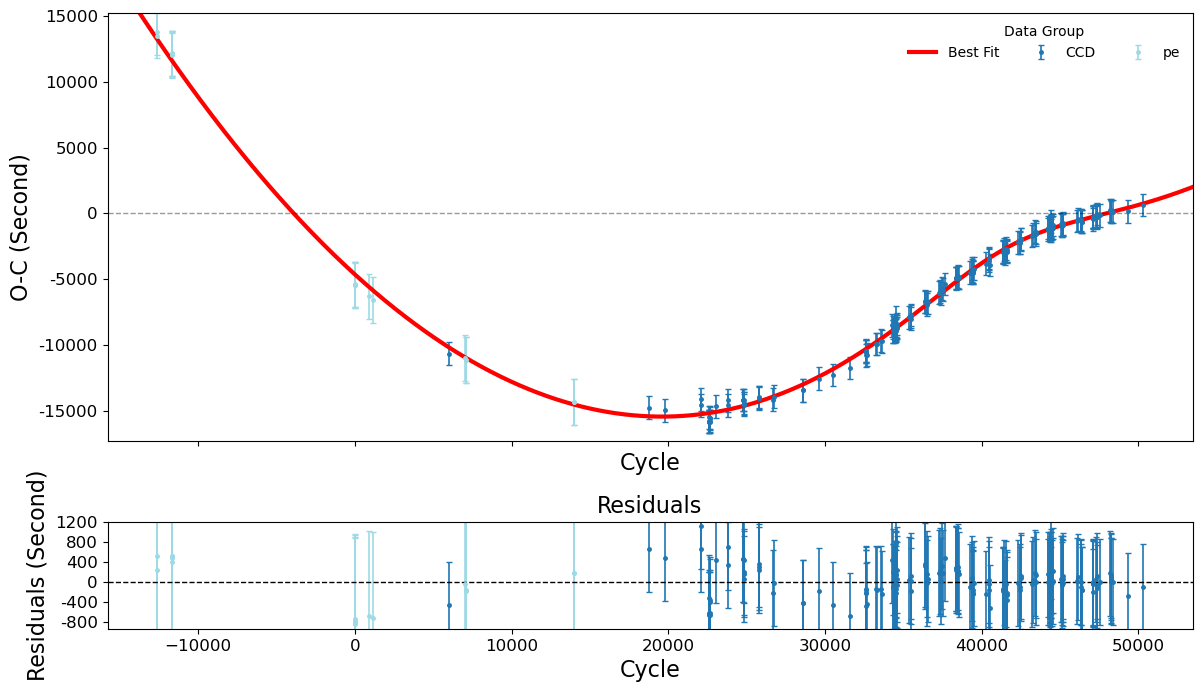

In [35]:
fit.plot(res_plot=True, res_hspace=.3)

In [36]:
print(fit.fitted_model.model_components[2].params["e"].std)

0.9647281843157407
